In [7]:
from main import *
from torch import optim
from torch.optim import lr_scheduler

In [8]:
lr = 0.4
momentum = 0.75
decay = 0.000
nesterov = True
epochs = 500

In [9]:
scheduler = None

Test Loss: 0.01983153074979782, Accuracy: 1.0)


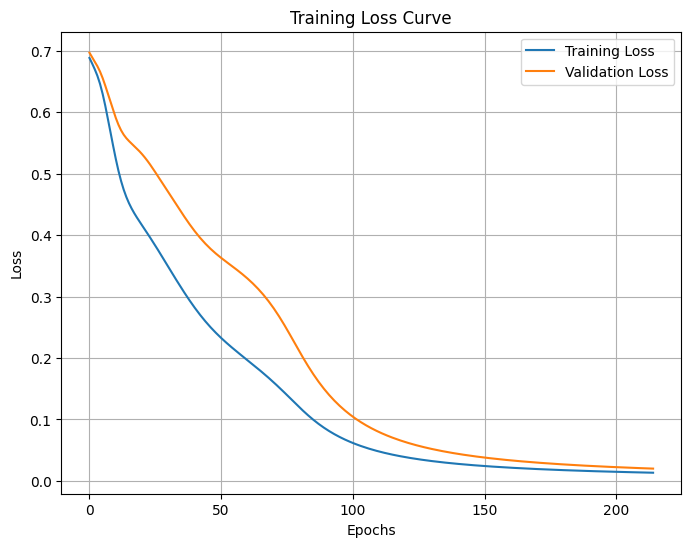

In [10]:
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
monk("monks-1", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=scheduler)

Test Loss: 0.010626201517879963, Accuracy: 1.0)


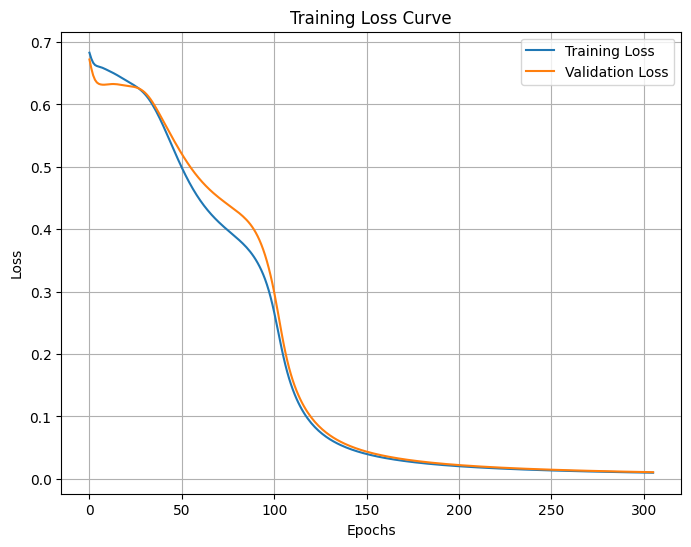

In [11]:
model = SimpleNN(17, 2, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
monk("monks-2", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=scheduler, eps= 0.00025)

Test Loss: 0.08886199444532394, Accuracy: 0.9699074074074074)


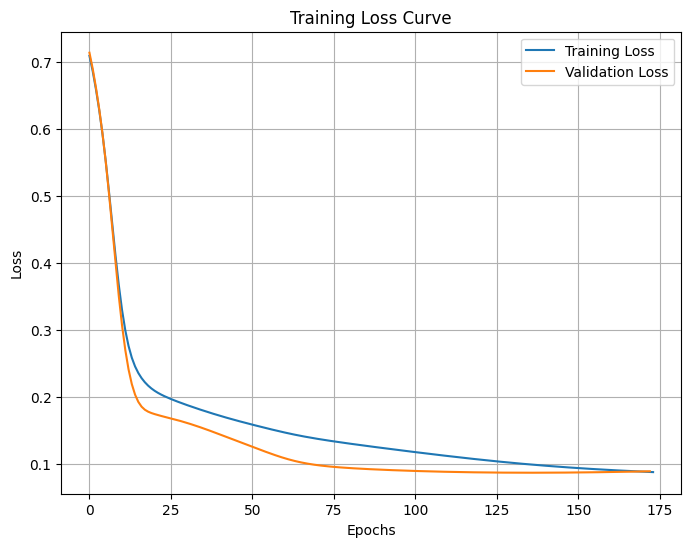

In [12]:
model = SimpleNN(17, 3, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=scheduler)